In [32]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:
df = pd.read_csv('Country-data.zip')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [20]:
df['life_expec'].max()

82.8

In [21]:
X = df.drop('country',axis =1)  
y = df['country']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0][0]

1.2915323778422956

<Axes: >

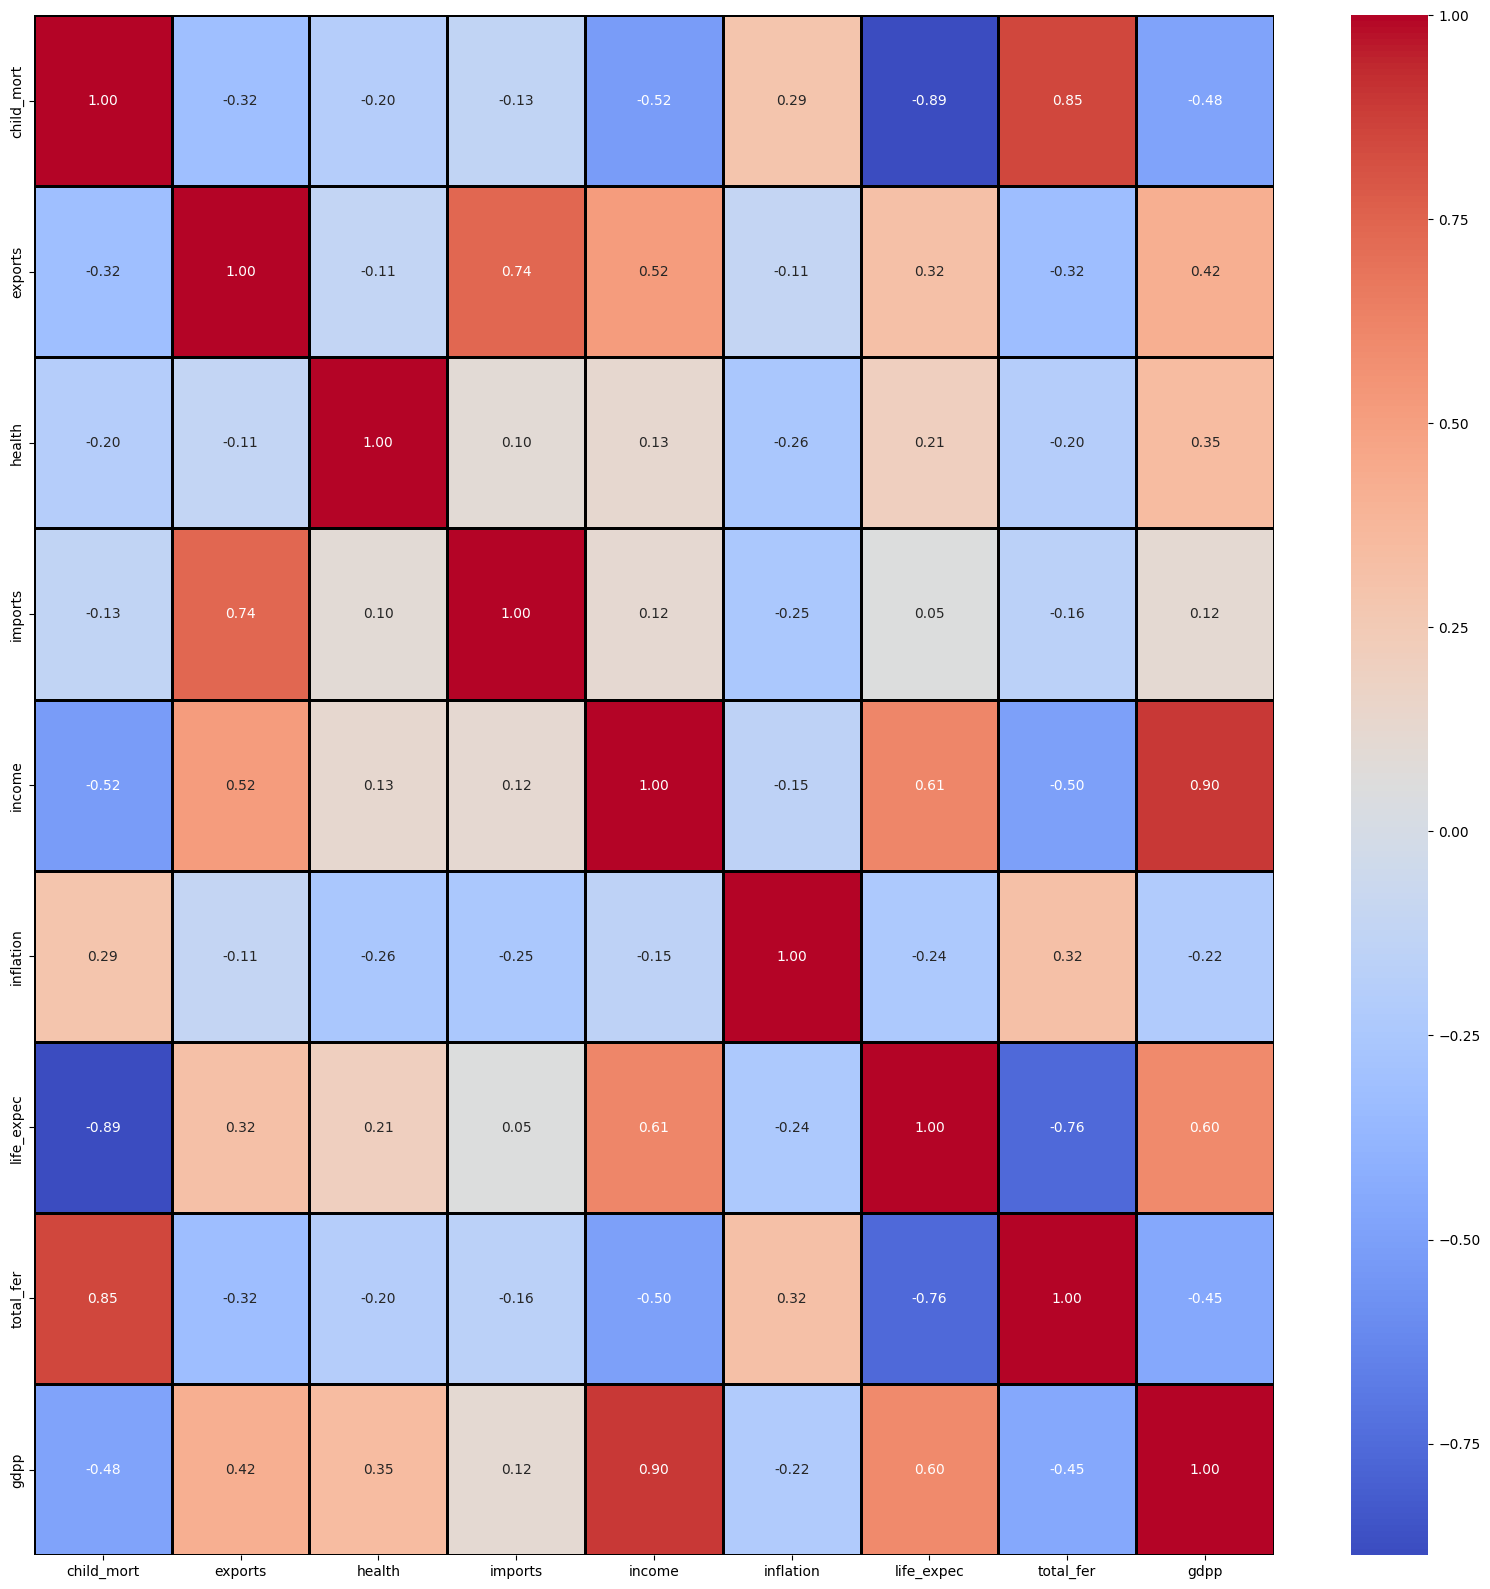

In [22]:
fig = plt.figure(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=2, linecolor='black')

In [23]:
#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=0.9, random_state=42)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(X_scaled)
principalComponents.shape

(167, 5)

In [24]:
# Получение собственных значений
eigenvalues = pca.explained_variance_


In [27]:
pca.explained_variance_ratio_[0]

0.4595173978609591

<Axes: >

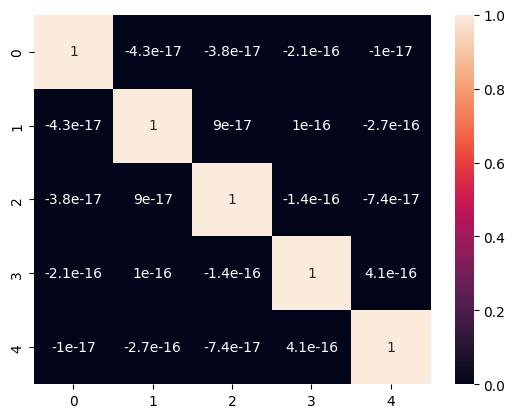

In [30]:
X_pca = pca.fit_transform(X_scaled)
corrmat = np.corrcoef(X_pca.transpose())
sns.heatmap(corrmat, annot=True)

In [33]:
X_pca

array([[-2.91302459e+00,  9.56205755e-02, -7.18118495e-01,
         1.00525464e+00, -1.58310044e-01],
       [ 4.29911330e-01, -5.88155666e-01, -3.33485505e-01,
        -1.16105859e+00,  1.74677321e-01],
       [-2.85225077e-01, -4.55174413e-01,  1.22150481e+00,
        -8.68114503e-01,  1.56474647e-01],
       [-2.93242265e+00,  1.69555507e+00,  1.52504374e+00,
         8.39625014e-01, -2.73208934e-01],
       [ 1.03357587e+00,  1.36658709e-01, -2.25720917e-01,
        -8.47062687e-01, -1.93006961e-01],
       [ 2.24072616e-02, -1.77918658e+00,  8.69997116e-01,
        -3.69668667e-02,  9.81056507e-01],
       [-1.01583737e-01, -5.68251724e-01,  2.42091816e-01,
        -1.46626576e+00, -5.59924282e-02],
       [ 2.34216461e+00, -1.98845915e+00,  1.90344188e-01,
         1.10503778e+00, -7.31192330e-01],
       [ 2.97376366e+00, -7.34688659e-01, -5.19766356e-01,
         1.20544210e+00,  8.35797058e-02],
       [-1.81486997e-01, -4.02865873e-01,  8.67458743e-01,
        -4.38772983e-01

In [34]:
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=1)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 9):
    silhouette.append(get_silhouette(clust_num, X_pca))

c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The de

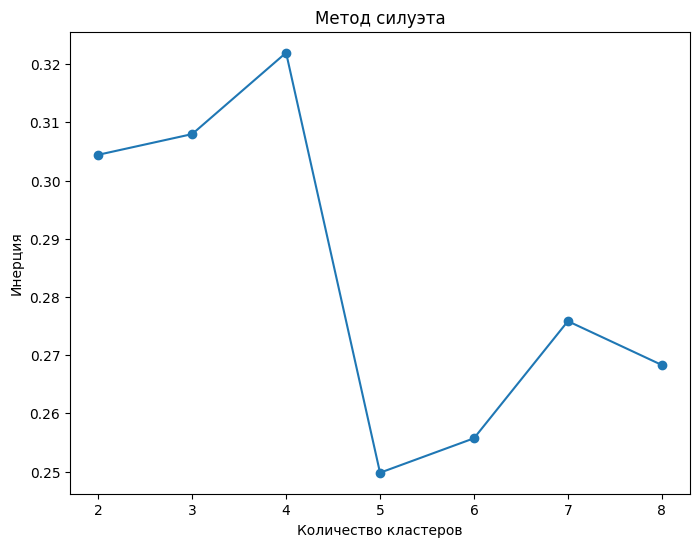

In [35]:
# визуализация метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), silhouette, marker='o', linestyle='-')
plt.title('Метод силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='K-Means_Cluster_ID', ylabel='child_mort'>

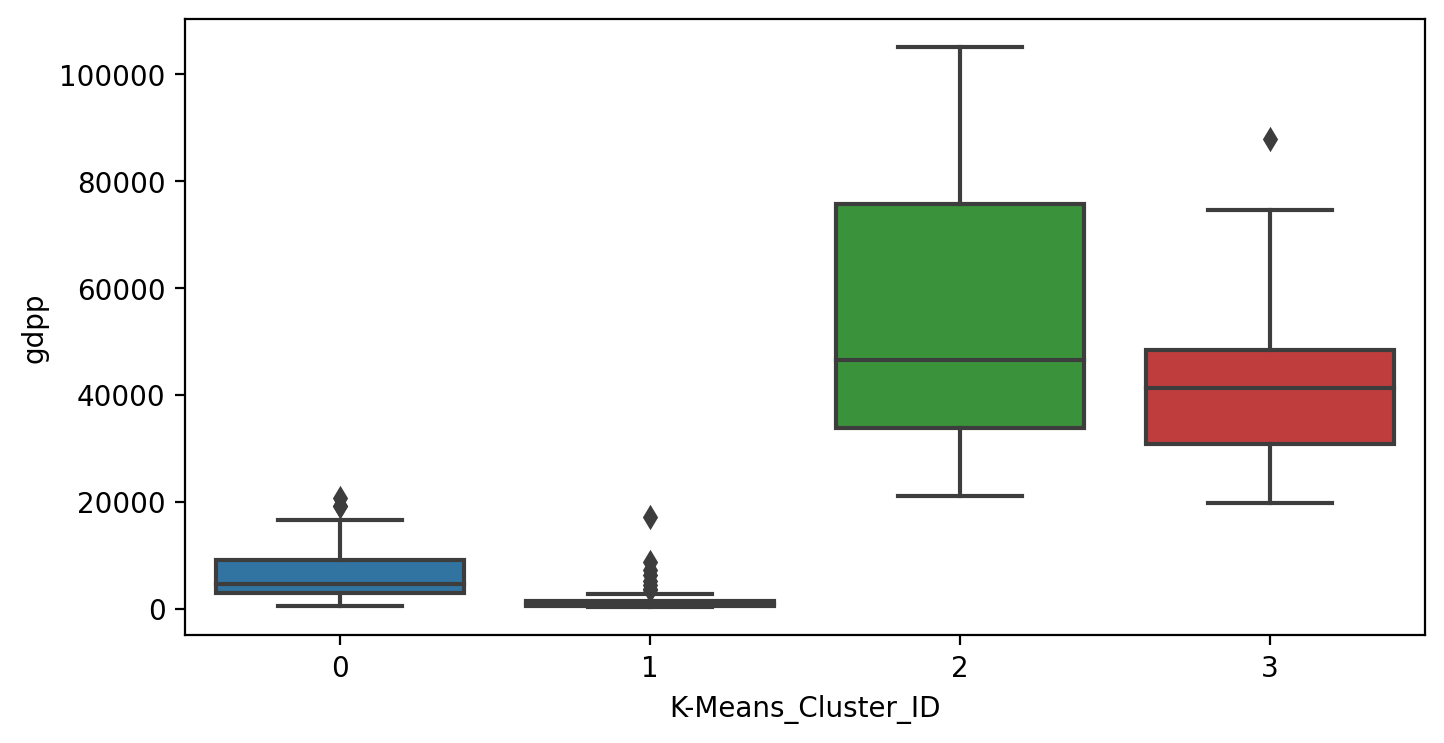

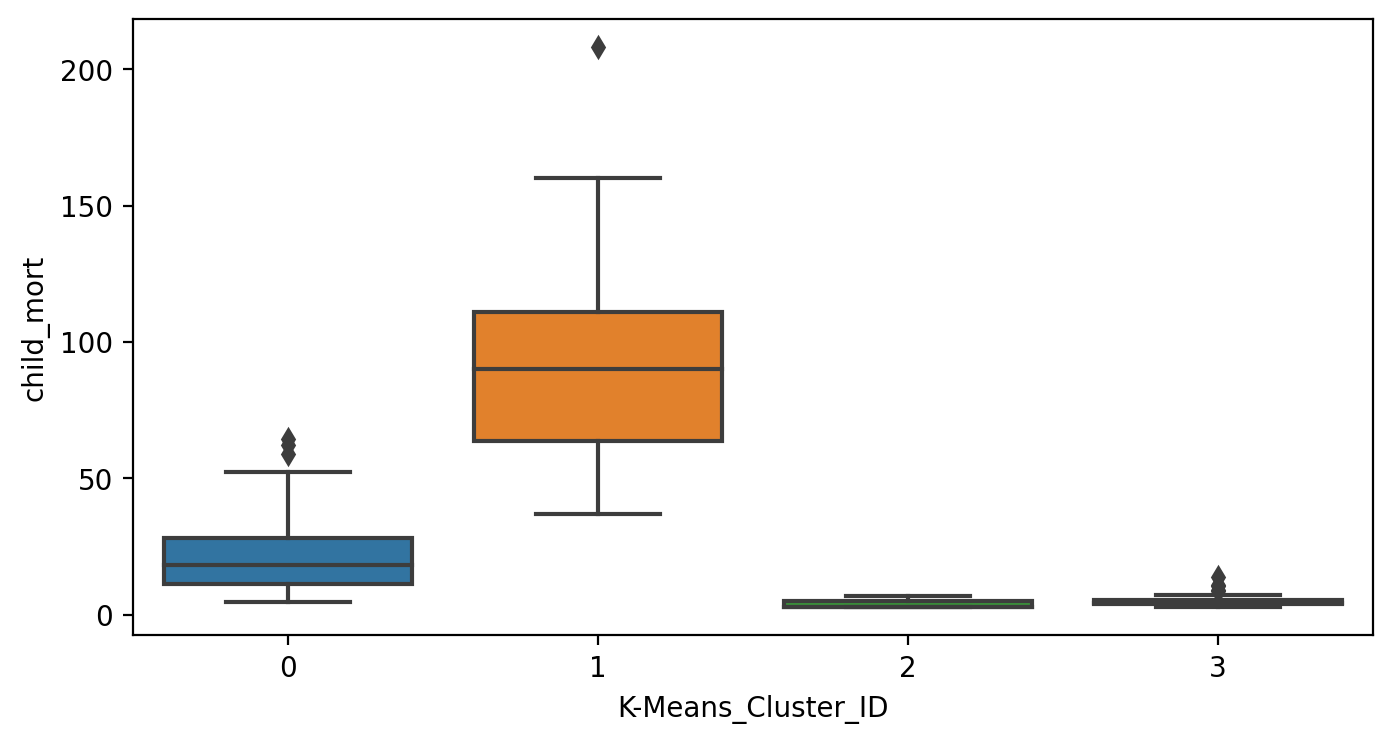

In [40]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X_pca)
df['K-Means_Cluster_ID'] = kmeans.labels_
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=df)
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=df)

In [37]:
df['label'] = k_means.labels_

In [39]:
df[df['child_mort'] == df['child_mort'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
68,Iceland,2.6,53.4,9.4,43.3,38800,5.47,82.0,2.2,41900,3


In [41]:
K_Means_countries = df[df['K-Means_Cluster_ID'] == 1]
K_Means_countries.sort_values(by = 'life_expec')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,K-Means_Cluster_ID
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,1,1
87,Lesotho,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170,1,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,1
166,Zambia,83.1,37.00,5.89,30.9,3280,14.000,52.0,5.40,1460,1,1
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,1,1
137,South Africa,53.7,28.60,8.94,27.4,12000,6.350,54.3,2.59,7280,1,1
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,1,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,1,1
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,1,1
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,1
